In [2]:
import numpy as np
import pandas as pd
import keras
import re
import os
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.image import ImageDataGenerator
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
#from keras.callbacks.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,model_from_json,Model
from keras.layers import Dense, Dropout, Activation,Bidirectional,Conv1D,MaxPooling1D,Flatten,GRU,SimpleRNN
from keras.layers import Embedding
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score
import sklearn
from keras.layers import LSTM
from keras.layers import SpatialDropout1D
from keras.utils import to_categorical
from keras.applications.resnet_v2 import ResNet50V2
from keras import optimizers

[nltk_data] Downloading package stopwords to /home/nahush/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /home/nahush/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [3]:
data = pd.read_csv("./project_data/data_7000_new.csv")

In [4]:
data.columns = ["MEME Name", "URL", "Text1", "Text2", "Sentiment_Humour", "Sentiment_General","Sentiment_Offensive","Sentiment_Motivational","Sentiment_Positive"]

In [5]:
data['Sentiment_Positive'][669] = 'positive'
data.dropna(inplace=True)

data['Sentiment_Positive'].fillna('positive',inplace=True)
pd.set_option('display.width', 2000)
print(data[data['Text2'].str.contains('funny').fillna(False) & ~data['Sentiment_Humour'].str.contains('hilarious').fillna(True) & ~data['Sentiment_Humour'].str.contains('funny').fillna(True)])


Empty DataFrame
Columns: [MEME Name, URL, Text1, Text2, Sentiment_Humour, Sentiment_General, Sentiment_Offensive, Sentiment_Motivational, Sentiment_Positive]
Index: []


In [6]:
STOPWORDS = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [7]:
for i in range(0,len(data)):
  if i not in data.index:
    continue
  text = data["Text2"][i]
  #print(text)
  text = str(text)
  bad_chars = [';', ':', '!', '*', '#','@','"','(',')']
  for j in bad_chars: 
    text = text.replace(j, ' ') 
  text = text.lower()
  text = ' '.join(word for word in text.split() if word not in STOPWORDS)
  word_list = []
  for word in text.split():
    word = lemmatizer.lemmatize(word)
    word_list.append(word)
  text = ' '.join(word for word in word_list)
  data["Text2"][i] = text 

In [9]:
X=data['Text2']
MAX_NB_WORDS = 13000
MAX_SEQUENCE_LENGTH = 60
EMBEDDING_DIM = 200
tokenizer = Tokenizer(lower=True)
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
X_proc = tokenizer.texts_to_sequences(X)
X_proc = pad_sequences(X_proc, maxlen=MAX_SEQUENCE_LENGTH,padding='post')
print('Shape of data tensor:', X_proc.shape)

Found 12104 unique tokens.
Shape of data tensor: (6367, 60)


In [57]:
print(X)

0       best 10 yearchallenge completed le 4 years. ku...
1       sam thorne strippin follow follow saw everyone...
2                   10 year challenge - sweet dee edition
3       10 year challenge filter 47 hilarious 10 year ...
4       1998 get car stranger 2008 meet people interne...
5       10 year challenge lit af üs & b erg 1945 1955 ...
6       10 year challenge emotional edition boredpanda...
7       fornite died 10 month minecraft never died 10 ...
8       facebook '10 year challenge' ploy simple meme?...
9       probably first man 10 year challenge chennai p...
10      state dining room white house 2009 vs. 2019 bo...
11      facebook 10 year challenge kind me. went 10 ye...
12      ifidownloada movie jamaica meme 2009 ami pirat...
13            anti-vaxx kid see someone 10 year challenge
14      get 10 year challenge time something acknowledge.
15      wakeup read message sent actual family member ...
16      looking latest meme realize lost game decided ...
17            

In [10]:
Y = data.iloc[:,4:]

Y_motivational = Y['Sentiment_Motivational']
print(Y_motivational[0])
#Y_positive = (Y[Y['Sentiment_Positive']!='neutral'])['Sentiment_Positive']
Y_positive = (Y['Sentiment_Positive'])
Y_offensive = Y['Sentiment_Offensive']
Y_general = Y['Sentiment_General']
Y_humour = Y['Sentiment_Humour']
Y_motivational = pd.get_dummies(Y_motivational)
Y_positive = pd.get_dummies(Y_positive)
Y_offensive = pd.get_dummies(Y_offensive)
Y_general = pd.get_dummies(Y_general)
Y_humour = pd.get_dummies(Y_humour)
print(Y_positive.columns)
#print(Y.head())
#print(data.iloc[:,4:].head())

motivational
Index(['negative', 'neutral', 'positive', 'very_negative', 'very_positive'], dtype='object')


In [ ]:
# from gensim.test.utils import datapath, get_tmpfile
# from gensim.models import KeyedVectors
# from gensim.scripts.glove2word2vec import glove2word2vec
# glove_file = ('/content/drive/My Drive/glove-twitter-27B-200d.txt')
# tmp_file = get_tmpfile("test_word2vec.txt")

# _ = glove2word2vec(glove_file, tmp_file)

# glove_twitter = KeyedVectors.load_word2vec_format(tmp_file)

In [ ]:
# #TWITTER
# embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
# for word, i in word_index.items():
#     try:
#       embedding_vector = glove_twitter.wv[word]
#       if embedding_vector is not None:
#           # words not found in embedding index will be all-zeros
#           embedding_matrix[i] = embedding_vector
#     except:
#        f=0

In [45]:
#TWITTER
from keras.layers import Embedding

p = pd.read_csv("twitter_matrix.csv")
embedding_matrix = pd.read_csv("twitter_matrix.csv")
p = np.zeros((1,200))
# p = p.to_numpy()
# np.reshape(p, (1,200))

# print(p.shape)
# embedding_matrix = np.append(p, embedding_matrix.to_numpy()) 

embedding_matrix = embedding_matrix.to_numpy()

embedding_matrix = np.concatenate((p, embedding_matrix), axis=0)

print(embedding_matrix.shape)

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

(12105, 200)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import skimage
from keras.models import load_model
from keras.models import model_from_json 


In [15]:
data1 = pd.read_csv("/home/nahush/Desktop/NNFL/project_data/data_7000_new.csv")
# data1['Sentiment_Positive'][669] = 'positive'
data1.dropna(inplace=True)
# data2 = pd.read_csv("/home/nahush/Desktop/nnfl-assignment-i/test_data_file_id.csv")
# t = cv2.imread('./data/final_train/682.jpg')
data1.columns = ["MEME Name", "URL", "Text1", "Text2", "Sentiment_Humour", "Sentiment_General","Sentiment_Offensive","Sentiment_Motivational","Sentiment_Positive"]
data1['Sentiment_Positive'][669] = 'positive'

In [16]:
# Load data

nums = re.compile(r'(\d+)')
def key(value):
    parts = nums.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts


names = data1['MEME Name']


In [128]:


# for i in trainingImages:
#     j = skimage.transform.rescale(i, 0.25, anti_aliasing = True)
#     trainingImages1.append(j.astype('float32') / 255.)

#test_path = './data/final_test'
trainingImages1 = []
y_train = []
y_train_pos = []
y_train_mot = []
x_proc2 = np.zeros((1,60))
c=0
for i in sorted(os.listdir("./project_data/data_7000/"), key=key):
#     print(i)
    if i in names.values:
        imgFile="./project_data/data_7000/"+i
        img = cv2.imread(imgFile)
        if img is not None:
            print(c)
            
    #         print(imgFile)
    #         img = cv2.imread(imgFile)
    #         print(img.shape)
            img = cv2.resize(img,(224,224))
    #         print(img.shape)
        #     print(type(img))
            img = img.astype('float32')
    #         print(type(img))
            trainingImages1.append(img/255.)
            y_train2 = data1.loc[data1['MEME Name'] == i]
            y_traino = y_train2['Sentiment_Offensive'].values[0]
            y_trainpos = y_train2['Sentiment_Positive'].values[0]
            y_trainmot = y_train2['Sentiment_Motivational'].values[0]
#             x_proc2 = np.concatenate((x_proc2, X_proc[c]))
            xreq = [X_proc[c]]
            xreq = np.asarray(xreq)
            x_proc2 = np.concatenate((x_proc2, xreq), axis = 0)
            print(x_proc2.shape)
            y_train.append(y_traino)
            y_train_pos.append(y_trainpos)
            y_train_mot.append(y_trainmot)

        c+=1
# x_train = np.asarray(trainingImages1)
        
# y_train = df.loc[df['MEME_Name'].isin(x_train)]
# y_train = y_train['Sentiment_Offensive']
# y_train = y_train.to_numpy() 

# print(y_train)

0
(2, 60)
1
(3, 60)
2
(4, 60)
3
(5, 60)
4
(6, 60)
5
(7, 60)
6
(8, 60)
7
(9, 60)
8
(10, 60)
9
(11, 60)
10
(12, 60)
11
(13, 60)
12
(14, 60)
13
(15, 60)
14
(16, 60)
15
(17, 60)
16
(18, 60)
17
(19, 60)
18
(20, 60)
19
(21, 60)
20
(22, 60)
21
(23, 60)
22
(24, 60)
23
(25, 60)
24
(26, 60)
25
(27, 60)
26
(28, 60)
27
(29, 60)
28
(30, 60)
29
(31, 60)
30
(32, 60)
31
(33, 60)
32
(34, 60)
33
(35, 60)
34
(36, 60)
35
(37, 60)
36
(38, 60)
37
(39, 60)
38
(40, 60)
39
(41, 60)
40
(42, 60)
41
(43, 60)
42
(44, 60)
43
(45, 60)
44
(46, 60)
45
(47, 60)
46
(48, 60)
47
(49, 60)
48
(50, 60)
49
(51, 60)
50
(52, 60)
51
(53, 60)
52
(54, 60)
53
(55, 60)
54
(56, 60)
55
(57, 60)
56
(58, 60)
57
(59, 60)
58
(60, 60)
59
(61, 60)
60
(62, 60)
61
(63, 60)
62
(64, 60)
63
(65, 60)
64
(66, 60)
65
(67, 60)
66
(68, 60)
67
(69, 60)
68
(70, 60)
69
(71, 60)
70
(72, 60)
71
(73, 60)
72
(74, 60)
73
(75, 60)
74
(76, 60)
75
(77, 60)
76
(78, 60)
77
(79, 60)
78
(80, 60)
79
(81, 60)
80
(82, 60)
81
(83, 60)
82
(84, 60)
83
(85, 60)
84
(86, 60

606
(608, 60)
607
(609, 60)
608
(610, 60)
609
(611, 60)
610
(612, 60)
611
(613, 60)
612
(614, 60)
613
(615, 60)
614
(616, 60)
615
(617, 60)
616
(618, 60)
617
(619, 60)
618
(620, 60)
619
(621, 60)
620
(622, 60)
621
(623, 60)
622
(624, 60)
623
(625, 60)
624
(626, 60)
625
(627, 60)
626
(628, 60)
627
(629, 60)
628
(630, 60)
629
(631, 60)
630
(632, 60)
631
(633, 60)
632
(634, 60)
633
(635, 60)
634
(636, 60)
635
(637, 60)
636
(638, 60)
637
(639, 60)
638
(640, 60)
639
(641, 60)
640
(642, 60)
641
(643, 60)
642
(644, 60)
643
(645, 60)
644
(646, 60)
645
(647, 60)
646
(648, 60)
647
(649, 60)
648
(650, 60)
649
(651, 60)
650
(652, 60)
651
(653, 60)
652
(654, 60)
653
(655, 60)
654
(656, 60)
655
(657, 60)
656
(658, 60)
657
(659, 60)
658
(660, 60)
659
(661, 60)
660
(662, 60)
661
(663, 60)
662
(664, 60)
663
(665, 60)
664
(666, 60)
665
(667, 60)
666
(668, 60)
667
(669, 60)
668
(670, 60)
669
(671, 60)
670
(672, 60)
671
(673, 60)
672
(674, 60)
673
(675, 60)
674
(676, 60)
675
(677, 60)
676
(678, 60)
677
(6

(1176, 60)
1175
(1177, 60)
1176
(1178, 60)
1177
(1179, 60)
1178
(1180, 60)
1179
(1181, 60)
1180
(1182, 60)
1181
(1183, 60)
1182
(1184, 60)
1183
(1185, 60)
1184
(1186, 60)
1185
(1187, 60)
1186
(1188, 60)
1187
(1189, 60)
1188
(1190, 60)
1189
(1191, 60)
1190
(1192, 60)
1191
(1193, 60)
1192
(1194, 60)
1193
(1195, 60)
1194
(1196, 60)
1195
(1197, 60)
1196
(1198, 60)
1197
(1199, 60)
1198
(1200, 60)
1199
(1201, 60)
1200
(1202, 60)
1201
(1203, 60)
1202
(1204, 60)
1203
(1205, 60)
1204
(1206, 60)
1205
(1207, 60)
1206
(1208, 60)
1207
(1209, 60)
1208
(1210, 60)
1209
(1211, 60)
1210
(1212, 60)
1211
(1213, 60)
1212
(1214, 60)
1213
(1215, 60)
1214
(1216, 60)
1215
(1217, 60)
1216
(1218, 60)
1217
(1219, 60)
1218
(1220, 60)
1219
(1221, 60)
1220
(1222, 60)
1221
(1223, 60)
1222
(1224, 60)
1223
(1225, 60)
1224
(1226, 60)
1225
(1227, 60)
1226
(1228, 60)
1227
(1229, 60)
1228
(1230, 60)
1229
(1231, 60)
1230
(1232, 60)
1231
(1233, 60)
1232
(1234, 60)
1233
(1235, 60)
1234
(1236, 60)
1235
(1237, 60)
1236
(1238, 6

(1701, 60)
1700
(1702, 60)
1701
(1703, 60)
1702
(1704, 60)
1703
(1705, 60)
1704
(1706, 60)
1705
(1707, 60)
1706
(1708, 60)
1707
(1709, 60)
1708
(1710, 60)
1709
(1711, 60)
1710
(1712, 60)
1711
(1713, 60)
1712
(1714, 60)
1713
(1715, 60)
1714
(1716, 60)
1715
(1717, 60)
1716
(1718, 60)
1717
(1719, 60)
1718
(1720, 60)
1719
(1721, 60)
1720
(1722, 60)
1721
(1723, 60)
1722
(1724, 60)
1723
(1725, 60)
1724
(1726, 60)
1725
(1727, 60)
1726
(1728, 60)
1727
(1729, 60)
1728
(1730, 60)
1729
(1731, 60)
1730
(1732, 60)
1731
(1733, 60)
1732
(1734, 60)
1733
(1735, 60)
1734
(1736, 60)
1735
(1737, 60)
1736
(1738, 60)
1737
(1739, 60)
1738
(1740, 60)
1739
(1741, 60)
1740
(1742, 60)
1741
(1743, 60)
1742
(1744, 60)
1743
(1745, 60)
1744
(1746, 60)
1745
(1747, 60)
1746
(1748, 60)
1747
(1749, 60)
1748
(1750, 60)
1749
(1751, 60)
1750
(1752, 60)
1751
(1753, 60)
1752
(1754, 60)
1753
(1755, 60)
1754
(1756, 60)
1755
(1757, 60)
1756
(1758, 60)
1757
(1759, 60)
1758
(1760, 60)
1759
(1761, 60)
1760
(1762, 60)
1761
(1763, 6

(2224, 60)
2223
(2225, 60)
2224
(2226, 60)
2225
(2227, 60)
2226
(2228, 60)
2227
(2229, 60)
2228
(2230, 60)
2229
(2231, 60)
2230
(2232, 60)
2231
(2233, 60)
2232
(2234, 60)
2233
(2235, 60)
2234
(2236, 60)
2235
(2237, 60)
2236
(2238, 60)
2237
(2239, 60)
2238
(2240, 60)
2239
(2241, 60)
2240
(2242, 60)
2241
(2243, 60)
2242
(2244, 60)
2243
(2245, 60)
2244
(2246, 60)
2245
(2247, 60)
2246
(2248, 60)
2247
(2249, 60)
2248
(2250, 60)
2249
(2251, 60)
2250
(2252, 60)
2251
(2253, 60)
2252
(2254, 60)
2253
(2255, 60)
2254
(2256, 60)
2255
(2257, 60)
2256
(2258, 60)
2257
(2259, 60)
2258
(2260, 60)
2259
(2261, 60)
2260
(2262, 60)
2261
(2263, 60)
2262
(2264, 60)
2263
(2265, 60)
2264
(2266, 60)
2265
(2267, 60)
2266
(2268, 60)
2267
(2269, 60)
2268
(2270, 60)
2269
(2271, 60)
2270
(2272, 60)
2271
(2273, 60)
2272
(2274, 60)
2273
(2275, 60)
2274
(2276, 60)
2275
(2277, 60)
2276
(2278, 60)
2277
(2279, 60)
2278
(2280, 60)
2279
(2281, 60)
2280
(2282, 60)
2281
(2283, 60)
2282
(2284, 60)
2283
(2285, 60)
2284
(2286, 6

2738
(2738, 60)
2739
(2739, 60)
2740
(2740, 60)
2741
(2741, 60)
2742
(2742, 60)
2743
(2743, 60)
2744
(2744, 60)
2745
(2745, 60)
2746
(2746, 60)
2747
(2747, 60)
2748
(2748, 60)
2749
(2749, 60)
2750
(2750, 60)
2751
(2751, 60)
2752
(2752, 60)
2753
(2753, 60)
2754
(2754, 60)
2755
(2755, 60)
2756
(2756, 60)
2757
(2757, 60)
2758
(2758, 60)
2759
(2759, 60)
2760
(2760, 60)
2761
(2761, 60)
2762
(2762, 60)
2763
(2763, 60)
2764
(2764, 60)
2765
(2765, 60)
2766
(2766, 60)
2767
(2767, 60)
2768
(2768, 60)
2769
(2769, 60)
2770
(2770, 60)
2771
(2771, 60)
2772
(2772, 60)
2773
(2773, 60)
2774
(2774, 60)
2775
(2775, 60)
2776
(2776, 60)
2777
(2777, 60)
2778
(2778, 60)
2779
(2779, 60)
2780
(2780, 60)
2781
(2781, 60)
2782
(2782, 60)
2783
(2783, 60)
2784
(2784, 60)
2785
(2785, 60)
2786
(2786, 60)
2787
(2787, 60)
2788
(2788, 60)
2789
(2789, 60)
2790
(2790, 60)
2791
(2791, 60)
2792
(2792, 60)
2793
(2793, 60)
2794
(2794, 60)
2795
(2795, 60)
2796
(2796, 60)
2797
(2797, 60)
2798
(2798, 60)
2799
(2799, 60)
2800
(28

3251
(3251, 60)
3252
(3252, 60)
3253
(3253, 60)
3254
(3254, 60)
3255
(3255, 60)
3256
(3256, 60)
3257
(3257, 60)
3258
(3258, 60)
3259
(3259, 60)
3260
(3260, 60)
3261
(3261, 60)
3262
(3262, 60)
3263
(3263, 60)
3264
(3264, 60)
3265
(3265, 60)
3266
(3266, 60)
3267
(3267, 60)
3268
(3268, 60)
3269
(3269, 60)
3270
(3270, 60)
3271
(3271, 60)
3272
(3272, 60)
3273
(3273, 60)
3274
(3274, 60)
3275
(3275, 60)
3276
(3276, 60)
3277
(3277, 60)
3278
(3278, 60)
3279
(3279, 60)
3280
(3280, 60)
3281
(3281, 60)
3282
(3282, 60)
3283
(3283, 60)
3284
(3284, 60)
3285
(3285, 60)
3286
(3286, 60)
3287
(3287, 60)
3288
(3288, 60)
3289
(3289, 60)
3290
(3290, 60)
3291
(3291, 60)
3292
(3292, 60)
3293
(3293, 60)
3294
(3294, 60)
3295
(3295, 60)
3296
(3296, 60)
3297
(3297, 60)
3298
(3298, 60)
3299
(3299, 60)
3300
(3300, 60)
3301
(3301, 60)
3302
(3302, 60)
3303
(3303, 60)
3304
(3304, 60)
3305
(3305, 60)
3306
(3306, 60)
3307
(3307, 60)
3308
(3308, 60)
3309
(3309, 60)
3310
(3310, 60)
3311
(3311, 60)
3312
(3312, 60)
3313
(33

3772
(3772, 60)
3773
(3773, 60)
3774
(3774, 60)
3775
(3775, 60)
3776
(3776, 60)
3777
(3777, 60)
3778
(3778, 60)
3779
(3779, 60)
3780
(3780, 60)
3781
(3781, 60)
3782
(3782, 60)
3783
(3783, 60)
3784
(3784, 60)
3785
(3785, 60)
3786
(3786, 60)
3787
(3787, 60)
3788
(3788, 60)
3789
(3789, 60)
3790
(3790, 60)
3791
(3791, 60)
3792
(3792, 60)
3793
(3793, 60)
3794
(3794, 60)
3795
(3795, 60)
3796
(3796, 60)
3797
(3797, 60)
3798
(3798, 60)
3799
(3799, 60)
3800
(3800, 60)
3801
(3801, 60)
3802
(3802, 60)
3803
(3803, 60)
3804
(3804, 60)
3805
(3805, 60)
3806
(3806, 60)
3807
(3807, 60)
3808
(3808, 60)
3809
(3809, 60)
3810
(3810, 60)
3811
(3811, 60)
3812
(3812, 60)
3813
(3813, 60)
3814
(3814, 60)
3815
(3815, 60)
3816
(3816, 60)
3817
(3817, 60)
3818
(3818, 60)
3819
(3819, 60)
3820
(3820, 60)
3821
(3821, 60)
3822
(3822, 60)
3823
(3823, 60)
3824
(3824, 60)
3825
(3825, 60)
3826
(3826, 60)
3827
(3827, 60)
3828
(3828, 60)
3829
(3829, 60)
3830
(3830, 60)
3831
(3831, 60)
3832
(3832, 60)
3833
(3833, 60)
3834
(38

4296
(4296, 60)
4297
(4297, 60)
4298
(4298, 60)
4299
(4299, 60)
4300
(4300, 60)
4301
(4301, 60)
4302
(4302, 60)
4303
(4303, 60)
4304
(4304, 60)
4305
(4305, 60)
4306
(4306, 60)
4307
(4307, 60)
4308
(4308, 60)
4309
(4309, 60)
4310
(4310, 60)
4311
(4311, 60)
4312
(4312, 60)
4313
(4313, 60)
4314
(4314, 60)
4315
(4315, 60)
4316
(4316, 60)
4317
(4317, 60)
4318
(4318, 60)
4319
(4319, 60)
4320
(4320, 60)
4321
(4321, 60)
4322
(4322, 60)
4323
(4323, 60)
4324
(4324, 60)
4325
(4325, 60)
4326
(4326, 60)
4327
(4327, 60)
4328
(4328, 60)
4329
(4329, 60)
4330
(4330, 60)
4331
(4331, 60)
4332
(4332, 60)
4333
(4333, 60)
4334
(4334, 60)
4335
(4335, 60)
4336
(4336, 60)
4337
(4337, 60)
4338
(4338, 60)
4339
(4339, 60)
4340
(4340, 60)
4341
(4341, 60)
4342
(4342, 60)
4343
(4343, 60)
4344
(4344, 60)
4345
(4345, 60)
4346
(4346, 60)
4347
(4347, 60)
4348
(4348, 60)
4349
(4349, 60)
4350
(4350, 60)
4351
(4351, 60)
4352
(4352, 60)
4353
(4353, 60)
4354
(4354, 60)
4355
(4355, 60)
4356
(4356, 60)
4357
(4357, 60)
4358
(43

4813
(4813, 60)
4814
(4814, 60)
4815
(4815, 60)
4816
(4816, 60)
4817
(4817, 60)
4818
(4818, 60)
4819
(4819, 60)
4820
(4820, 60)
4821
(4821, 60)
4822
(4822, 60)
4823
(4823, 60)
4824
(4824, 60)
4825
(4825, 60)
4826
(4826, 60)
4827
(4827, 60)
4828
(4828, 60)
4829
(4829, 60)
4830
(4830, 60)
4831
(4831, 60)
4832
(4832, 60)
4833
(4833, 60)
4834
(4834, 60)
4835
(4835, 60)
4836
(4836, 60)
4837
(4837, 60)
4838
(4838, 60)
4839
(4839, 60)
4840
(4840, 60)
4841
(4841, 60)
4842
(4842, 60)
4843
(4843, 60)
4844
(4844, 60)
4845
(4845, 60)
4846
(4846, 60)
4847
(4847, 60)
4848
(4848, 60)
4849
(4849, 60)
4850
(4850, 60)
4851
(4851, 60)
4852
(4852, 60)
4853
(4853, 60)
4854
(4854, 60)
4855
(4855, 60)
4856
(4856, 60)
4857
(4857, 60)
4858
(4858, 60)
4859
(4859, 60)
4860
(4860, 60)
4861
(4861, 60)
4862
(4862, 60)
4863
(4863, 60)
4864
(4864, 60)
4865
(4865, 60)
4866
(4866, 60)
4867
(4867, 60)
4868
(4868, 60)
4869
(4869, 60)
4870
(4870, 60)
4871
(4871, 60)
4872
(4872, 60)
4873
(4873, 60)
4874
(4874, 60)
4875
(48

5331
(5330, 60)
5332
(5331, 60)
5333
(5332, 60)
5334
(5333, 60)
5335
(5334, 60)
5336
(5335, 60)
5337
(5336, 60)
5338
(5337, 60)
5339
(5338, 60)
5340
(5339, 60)
5341
(5340, 60)
5342
(5341, 60)
5343
(5342, 60)
5344
(5343, 60)
5345
(5344, 60)
5346
(5345, 60)
5347
(5346, 60)
5348
(5347, 60)
5349
(5348, 60)
5350
(5349, 60)
5351
(5350, 60)
5352
(5351, 60)
5353
(5352, 60)
5354
(5353, 60)
5355
(5354, 60)
5356
(5355, 60)
5357
(5356, 60)
5358
(5357, 60)
5359
(5358, 60)
5360
(5359, 60)
5361
(5360, 60)
5362
(5361, 60)
5363
(5362, 60)
5364
(5363, 60)
5365
(5364, 60)
5366
(5365, 60)
5367
(5366, 60)
5368
(5367, 60)
5369
(5368, 60)
5370
(5369, 60)
5371
(5370, 60)
5372
(5371, 60)
5373
(5372, 60)
5374
(5373, 60)
5375
(5374, 60)
5376
(5375, 60)
5377
(5376, 60)
5378
(5377, 60)
5379
(5378, 60)
5380
(5379, 60)
5381
(5380, 60)
5382
(5381, 60)
5383
(5382, 60)
5384
(5383, 60)
5385
(5384, 60)
5386
(5385, 60)
5387
(5386, 60)
5388
(5387, 60)
5389
(5388, 60)
5390
(5389, 60)
5391
(5390, 60)
5392
(5391, 60)
5393
(53

5848
(5847, 60)
5849
(5848, 60)
5850
(5849, 60)
5851
(5850, 60)
5852
(5851, 60)
5853
(5852, 60)
5854
(5853, 60)
5855
(5854, 60)
5856
(5855, 60)
5857
(5856, 60)
5858
(5857, 60)
5859
(5858, 60)
5860
(5859, 60)
5861
(5860, 60)
5862
(5861, 60)
5863
(5862, 60)
5864
(5863, 60)
5865
(5864, 60)
5866
(5865, 60)
5867
(5866, 60)
5868
(5867, 60)
5869
(5868, 60)
5870
(5869, 60)
5871
(5870, 60)
5872
(5871, 60)
5873
(5872, 60)
5874
(5873, 60)
5875
(5874, 60)
5876
(5875, 60)
5877
(5876, 60)
5878
(5877, 60)
5879
(5878, 60)
5880
(5879, 60)
5881
(5880, 60)
5882
(5881, 60)
5883
(5882, 60)
5884
(5883, 60)
5885
(5884, 60)
5886
(5885, 60)
5887
(5886, 60)
5888
(5887, 60)
5889
(5888, 60)
5890
(5889, 60)
5891
(5890, 60)
5892
(5891, 60)
5893
(5892, 60)
5894
(5893, 60)
5895
(5894, 60)
5896
(5895, 60)
5897
(5896, 60)
5898
(5897, 60)
5899
(5898, 60)
5900
(5899, 60)
5901
(5900, 60)
5902
(5901, 60)
5903
(5902, 60)
5904
(5903, 60)
5905
(5904, 60)
5906
(5905, 60)
5907
(5906, 60)
5908
(5907, 60)
5909
(5908, 60)
5910
(59

In [129]:
# x_proc2 = np.zeros((1,60))

# xreq = [X_proc[0]]
# xreq = np.asarray(xreq)
# print(x_proc2.shape)

# x_proc2 = np.concatenate((x_proc2, xreq), axis = 0)
# 
print(x_proc2.shape)
buffer = np.copy(x_proc2)
print(buffer.shape)
buffer = np.delete(buffer, 0, axis=0)
print(buffer.shape)
# print(buffer)
# x_proc2 = np.copy(buffer)
# print(x_proc2)

(6363, 60)
(6363, 60)
(6362, 60)


In [130]:
print(buffer)
x_proc2 = np.copy(buffer)
print(x_proc2)

[[   35.   111.  4951. ...     0.     0.     0.]
 [ 3263.  4955.  4956. ...     0.     0.     0.]
 [  111.    27.   305. ...     0.     0.     0.]
 ...
 [ 4209.   127. 12085. ...     0.     0.     0.]
 [  285.   153.  2770. ...     0.     0.     0.]
 [ 4941.   887.   351. ...     0.     0.     0.]]
[[   35.   111.  4951. ...     0.     0.     0.]
 [ 3263.  4955.  4956. ...     0.     0.     0.]
 [  111.    27.   305. ...     0.     0.     0.]
 ...
 [ 4209.   127. 12085. ...     0.     0.     0.]
 [  285.   153.  2770. ...     0.     0.     0.]
 [ 4941.   887.   351. ...     0.     0.     0.]]


In [59]:
print(x_proc2)

[  35.  111. 4951. ...    0.    0.    0.]


In [131]:
print(x_proc2.shape)

(6362, 60)


In [132]:
#Load data part2
# y_tr.dropna()
# x_train = np.asarray(trainingImages1)
x_train = np.asarray(trainingImages1)
y_train3 = pd.DataFrame(y_train)

y_train3 = pd.get_dummies(y_train3)
y_train3 = np.asarray(y_train3)
# y_train.dropna()
x_train.shape, y_train3.shape
# print(y_train3)

y_trainCNN_o = y_train3

#Load data part2
# y_tr.dropna()
# x_train = np.asarray(trainingImages1)
# x_train = np.asarray(trainingImages1)
y_train_pos = pd.DataFrame(y_train_pos)

y_train_pos = pd.get_dummies(y_train_pos)
y_train_pos = np.asarray(y_train_pos)
# y_train.dropna()
x_train.shape, y_train_pos.shape
# print(y_train_pos)

y_trainCNN_pos = y_train_pos

#########


y_train_mot = pd.DataFrame(y_train_mot)

y_train_mot = pd.get_dummies(y_train_mot)
y_train_mot = np.asarray(y_train_mot)
# y_train.dropna()
x_train.shape, y_train_mot.shape
# print(y_train_mot)

y_trainCNN_mot = y_train_mot

[[0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 ...
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]]
[[0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 ...
 [0 0 0 0 1]
 [0 1 0 0 0]
 [0 1 0 0 0]]
[[1 0]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]


In [54]:
print(X_proc)

[[  35  111 4951 ...    0    0    0]
 [3263 4955 4956 ...    0    0    0]
 [ 111   27  305 ...    0    0    0]
 ...
 [4941  887  351 ...    0    0    0]
 [ 335   96  518 ...    0    0    0]
 [  42 2625  387 ...    0    0    0]]


In [19]:
print(x_train.shape, y_trainCNN.shape)


(6362, 224, 224, 3) (6362, 4)


In [ ]:
### MODEL FOR OFFENSIVE

In [182]:
resnet = ResNet50V2(weights='imagenet')
#resnet.trainable = False
#resnet.layers.pop()
#resnet.compile(optimizer='Adam',loss='categorical_crossentropy')
#cnn_model = resnet.layers[-1].output
#cnn_model.summary()
for layer in resnet.layers[:-1]:
  layer.trainable=False

#cnn_model.add(ResNet50V2(weights='imagenet'))
#cnn_model = cnn_model.layers[-1]
temp1 = Dense(128,activation='relu')(resnet.layers[-2].output)
temp2 = Dense(64,activation='relu')(temp1)
predictions = Dense(4, activation= 'softmax')(temp2)
img_model = Model(inputs = resnet.input, outputs = predictions)
img_model.summary()
#print(cnn_model.summary())
#img_model = Dense(2,activation='sigmoid')(cnn_model)
#cnn_model = Dense(4, activation='sigmoid')(resnet)
#img_model.summary(img_model.summary()
#resnet.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
___________________________________________________________________________________________

In [183]:
img_model.load_weights('Resnet-dense128-dense5-epoch-5.h5')

In [184]:
from keras import optimizers

#LATE FUSION FOR OFFENSIVE
twitter = Sequential()
twitter.add(embedding_layer)#### model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_proc.shape[1])) ##### making changes here maybe
#model.add(SpatialDropout1D(0.2))
#model.add((SimpleRNN(32,activation='relu',input_shape=(1,60))))
#model.add(Flatten())
#model.add(Dense(60,input_shape=(60,)))
# modelg.add((LSTM(200, activation='relu'))
twitter.add((LSTM(200,return_sequences=True,kernel_initializer='zeros',activation='relu')))

#model.add((LSTM(200,return_sequences=True,kernel_initializer='zeros',activation='relu')))
#model.add(LSTM(200,kernel_initializer='zeros',activation='relu'))
#model.add(Conv1D(512, 3, activation='relu'))
#model.add(MaxPooling1D(5))
#model.add(Conv1D(512, 3, activation='relu'))
#model.add(MaxPooling1D(2))
#model.add(Dense(128,activation='relu'))
#model.add(Dense(64,activation='relu'))
twitter.add(Flatten())

twitter.add(Dense(128, activation='relu', trainable =False))
twitter.add(Dense(64, activation='relu', trainable =False))

twitter.add(Dense(4, activation='softmax', trainable =False))

print(twitter.summary())
# twitter.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.01), metrics=['accuracy'])
# img_model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 60, 200)           2421000   
_________________________________________________________________
lstm_8 (LSTM)                (None, 60, 200)           320800    
_________________________________________________________________
flatten_8 (Flatten)          (None, 12000)             0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               1536128   
_________________________________________________________________
dense_53 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_54 (Dense)             (None, 4)                 260       
Total params: 4,286,444
Trainable params: 320,800
Non-trainable params: 3,965,644
_____________________________________

In [185]:
twitter.load_weights('text_offensive.h5')

In [186]:
twitter.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.01), metrics=['accuracy'])
img_model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])

In [187]:
concatenated = keras.layers.concatenate([img_model.layers[-2].output, twitter.layers[-2].output])
temp = Dense(64, activation='relu')(concatenated)
out = Dense(4,activation='softmax')(temp)
classification_model = Model(inputs=[img_model.input,twitter.input], outputs = out)
classification_model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
___________________________________________________________________________________________

In [188]:
classification_model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.01), metrics=['accuracy'])
fake_img = np.zeros([6367,224,224,3])

In [189]:
history = classification_model.fit([x_train, x_proc2], y_trainCNN_o,  epochs=5, batch_size=100, validation_split=0.1)  #### x_train maybe wrong

Train on 5725 samples, validate on 637 samples
Epoch 1/5
5725/5725 [==============================] - 339s 59ms/step - loss: 1.2109 - acc: 0.3862 - val_loss: 1.2139 - val_acc: 0.3626
Epoch 2/5
5725/5725 [==============================] - 335s 59ms/step - loss: 1.1621 - acc: 0.4107 - val_loss: 1.2394 - val_acc: 0.4003
Epoch 3/5
5725/5725 [==============================] - 340s 59ms/step - loss: 1.1498 - acc: 0.4178 - val_loss: 1.3080 - val_acc: 0.3783
Epoch 4/5
5725/5725 [==============================] - 348s 61ms/step - loss: 1.1332 - acc: 0.4239 - val_loss: 1.3379 - val_acc: 0.4019
Epoch 5/5
5725/5725 [==============================] - 353s 62ms/step - loss: 1.1141 - acc: 0.4604 - val_loss: 1.3242 - val_acc: 0.3799


In [190]:
classification_model.save('model_offensive.h5')
classification_model.save_weights('model_offensive_weights.h5')

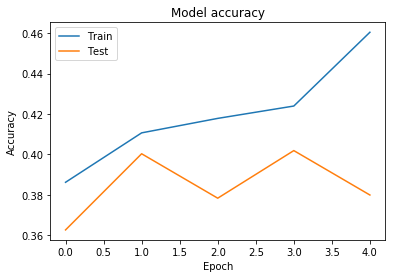

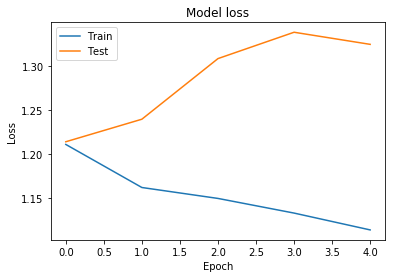

In [191]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
###### MODEL FOR POSITIVE

In [192]:
resnet = ResNet50V2(weights='imagenet')
#resnet.trainable = False
#resnet.layers.pop()
#resnet.compile(optimizer='Adam',loss='categorical_crossentropy')
#cnn_model = resnet.layers[-1].output
#cnn_model.summary()
for layer in resnet.layers[:-1]:
  layer.trainable=False

#cnn_model.add(ResNet50V2(weights='imagenet'))
#cnn_model = cnn_model.layers[-1]
temp1 = Dense(128,activation='relu')(resnet.layers[-2].output)
temp2 = Dense(64,activation='relu')(temp1)
predictions = Dense(5, activation= 'softmax')(temp2)
img_model = Model(inputs = resnet.input, outputs = predictions)
img_model.summary()
#print(cnn_model.summary())
#img_model = Dense(2,activation='sigmoid')(cnn_model)
#cnn_model = Dense(4, activation='sigmoid')(resnet)
#img_model.summary(img_model.summary()
#resnet.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
___________________________________________________________________________________________

In [193]:
img_model.load_weights('Resnet-dense128-dense5-epoch-2-POSTIIVE.h5')

In [196]:
from keras import optimizers

#LATE FUSION FOR POSITIVE
twitter = Sequential()
twitter.add(embedding_layer)#### model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_proc.shape[1])) ##### making changes here maybe
#model.add(SpatialDropout1D(0.2))
#model.add((SimpleRNN(32,activation='relu',input_shape=(1,60))))
#model.add(Flatten())
#model.add(Dense(60,input_shape=(60,)))
# modelg.add((LSTM(200, activation='relu'))
twitter.add((LSTM(200,return_sequences=True,kernel_initializer='zeros',activation='relu')))

#model.add((LSTM(200,return_sequences=True,kernel_initializer='zeros',activation='relu')))
#model.add(LSTM(200,kernel_initializer='zeros',activation='relu'))
#model.add(Conv1D(512, 3, activation='relu'))
#model.add(MaxPooling1D(5))
#model.add(Conv1D(512, 3, activation='relu'))
#model.add(MaxPooling1D(2))
#model.add(Dense(128,activation='relu'))
#model.add(Dense(64,activation='relu'))
twitter.add(Flatten())
twitter.add(Dense(128,activation='relu',trainable=False))

twitter.add(Dense(64, activation='relu', trainable =False))

twitter.add(Dense(5, activation='softmax', trainable =False))

print(twitter.summary())
# twitter.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.01), metrics=['accuracy'])
# img_model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 60, 200)           2421000   
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 200)           320800    
_________________________________________________________________
flatten_9 (Flatten)          (None, 12000)             0         
_________________________________________________________________
dense_60 (Dense)             (None, 128)               1536128   
_________________________________________________________________
dense_61 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_62 (Dense)             (None, 5)                 325       
Total params: 4,286,509
Trainable params: 320,800
Non-trainable params: 3,965,709
_____________________________________

In [197]:
twitter.load_weights('text_positive.h5')

In [198]:
twitter.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.01), metrics=['accuracy'])
img_model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])

In [199]:
concatenated = keras.layers.concatenate([img_model.layers[-2].output, twitter.layers[-2].output])
temp = Dense(64, activation='relu')(concatenated)
out = Dense(5,activation='softmax')(temp)
classification_model2 = Model(inputs=[img_model.input,twitter.input], outputs = out)
classification_model2.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
___________________________________________________________________________________________

In [200]:
classification_model2.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.01), metrics=['accuracy'])
fake_img = np.zeros([6367,224,224,3])

In [201]:
historyp = classification_model2.fit([x_train, x_proc2], y_trainCNN_pos,  epochs=5, batch_size=100, validation_split=0.1)  #### x_train maybe wrong

Train on 5725 samples, validate on 637 samples
Epoch 1/5
5725/5725 [==============================] - 366s 64ms/step - loss: 1.3589 - acc: 0.4241 - val_loss: 1.2453 - val_acc: 0.4647
Epoch 2/5
5725/5725 [==============================] - 354s 62ms/step - loss: 1.2743 - acc: 0.4405 - val_loss: 1.2506 - val_acc: 0.4537
Epoch 3/5
5725/5725 [==============================] - 362s 63ms/step - loss: 1.2520 - acc: 0.4442 - val_loss: 1.2785 - val_acc: 0.4615
Epoch 4/5
5725/5725 [==============================] - 356s 62ms/step - loss: 1.2233 - acc: 0.4613 - val_loss: 1.3904 - val_acc: 0.3846
Epoch 5/5
5725/5725 [==============================] - 355s 62ms/step - loss: 1.1998 - acc: 0.4695 - val_loss: 1.4107 - val_acc: 0.3407


In [202]:
classification_model2.save('model_positive.h5')
classification_model2.save_weights('model_positive_weights.h5')

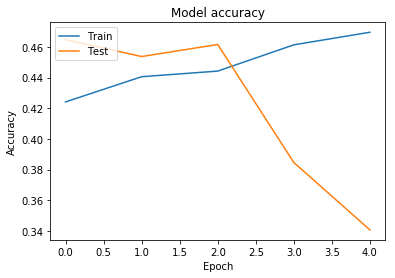

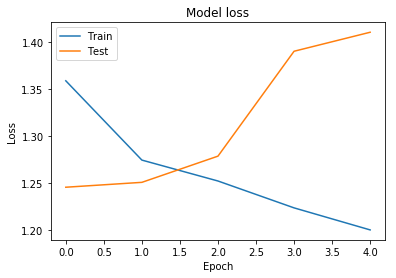

In [203]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(historyp.history['acc'])
plt.plot(historyp.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(historyp.history['loss'])
plt.plot(historyp.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
##### MODEL FOR MOTIVATIONAL

In [171]:
resnet = ResNet50V2(weights='imagenet')
#resnet.trainable = False
#resnet.layers.pop()
#resnet.compile(optimizer='Adam',loss='categorical_crossentropy')
#cnn_model = resnet.layers[-1].output
#cnn_model.summary()
for layer in resnet.layers[:-1]:
  layer.trainable=False

#cnn_model.add(ResNet50V2(weights='imagenet'))
#cnn_model = cnn_model.layers[-1]
temp1 = Dense(128,activation='relu')(resnet.layers[-2].output)
temp2 = Dense(64,activation='relu')(temp1)
predictions = Dense(2, activation= 'softmax')(temp2)
img_model = Model(inputs = resnet.input, outputs = predictions)
img_model.summary()
#print(cnn_model.summary())
#img_model = Dense(2,activation='sigmoid')(cnn_model)
#cnn_model = Dense(4, activation='sigmoid')(resnet)
#img_model.summary(img_model.summary()
#resnet.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [172]:
img_model.load_weights('Resnet-dense128-dense5-2epoch-MOTIVSTIONAL.h5')

In [174]:
from keras import optimizers

#LATE FUSION FOR MOTIVATIONAl
twitter = Sequential()
twitter.add(embedding_layer)#### model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_proc.shape[1])) ##### making changes here maybe
#model.add(SpatialDropout1D(0.2))
#model.add((SimpleRNN(32,activation='relu',input_shape=(1,60))))
#model.add(Flatten())
#model.add(Dense(60,input_shape=(60,)))
# modelg.add((LSTM(200, activation='relu'))
twitter.add((LSTM(200,return_sequences=True,kernel_initializer='zeros',activation='relu')))

#model.add((LSTM(200,return_sequences=True,kernel_initializer='zeros',activation='relu')))
#model.add(LSTM(200,kernel_initializer='zeros',activation='relu'))
#model.add(Conv1D(512, 3, activation='relu'))
#model.add(MaxPooling1D(5))
#model.add(Conv1D(512, 3, activation='relu'))
#model.add(MaxPooling1D(2))
#model.add(Dense(128,activation='relu'))
#model.add(Dense(64,activation='relu'))
twitter.add(Flatten())
twitter.add(Dense(128, activation='relu', trainable =False))
twitter.add(Dense(64, activation='relu', trainable =False))

twitter.add(Dense(2, activation='softmax', trainable =False))

print(twitter.summary())
# twitter.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.01), metrics=['accuracy'])
# img_model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 60, 200)           2421000   
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 200)           320800    
_________________________________________________________________
flatten_7 (Flatten)          (None, 12000)             0         
_________________________________________________________________
dense_44 (Dense)             (None, 128)               1536128   
_________________________________________________________________
dense_45 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_46 (Dense)             (None, 2)                 130       
Total params: 4,286,314
Trainable params: 320,800
Non-trainable params: 3,965,514
______________________________________

In [175]:
twitter.load_weights('text_motivational.h5')

In [176]:
twitter.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.01), metrics=['accuracy'])
img_model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(), metrics=['accuracy'])

In [177]:
concatenated = keras.layers.concatenate([img_model.layers[-2].output, twitter.layers[-2].output])
temp = Dense(64, activation='relu')(concatenated)
out = Dense(2,activation='softmax')(temp)
classification_model3 = Model(inputs=[img_model.input,twitter.input], outputs = out)
classification_model3.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [178]:
classification_model3.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.01), metrics=['accuracy'])
fake_img = np.zeros([6367,224,224,3])

In [179]:
historymot = classification_model3.fit([x_train, x_proc2], y_trainCNN_mot,  epochs=5, batch_size=100, validation_split=0.1)  #### x_train maybe wrong

Train on 5725 samples, validate on 637 samples
Epoch 1/5
5725/5725 [==============================] - 335s 59ms/step - loss: 0.6958 - acc: 0.6257 - val_loss: 0.6650 - val_acc: 0.6217
Epoch 2/5
5725/5725 [==============================] - 332s 58ms/step - loss: 0.6494 - acc: 0.6517 - val_loss: 0.6722 - val_acc: 0.6217
Epoch 3/5
5725/5725 [==============================] - 325s 57ms/step - loss: 0.6406 - acc: 0.6501 - val_loss: 0.6993 - val_acc: 0.6217
Epoch 4/5
5725/5725 [==============================] - 323s 56ms/step - loss: 0.6325 - acc: 0.6522 - val_loss: 0.6933 - val_acc: 0.6217
Epoch 5/5
5725/5725 [==============================] - 327s 57ms/step - loss: 0.6235 - acc: 0.6547 - val_loss: 0.7088 - val_acc: 0.6217


In [180]:
classification_model3.save('model_motivational.h5')
classification_model3.save_weights('model_motivational_weights.h5')

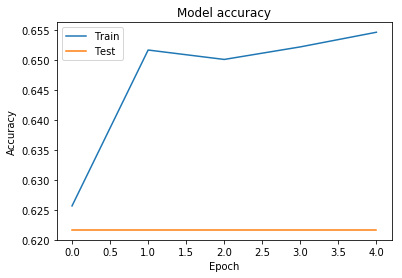

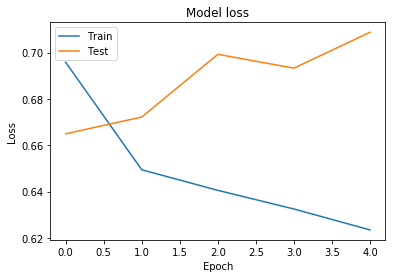

In [181]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(historymot.history['acc'])
plt.plot(historymot.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(historymot.history['loss'])
plt.plot(historymot.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()